In [1]:
import pandas as pd                                                
import numpy as np                                                  
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline

In [2]:
car_data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', car_data.shape)
car_data.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [4]:
car_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [5]:
car_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [6]:
car_data.corr()

,price,mileage,engV,year
price,1.000000,-0.312415,0.051070,0.370379
mileage,-0.312415,1.000000,0.047070,-0.495599
engV,0.051070,0.047070,1.000000,-0.042251
year,0.370379,-0.495599,-0.042251,1.000000


In [7]:
car_data.dropna(axis=0, inplace=True)
car_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [8]:
car_data.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

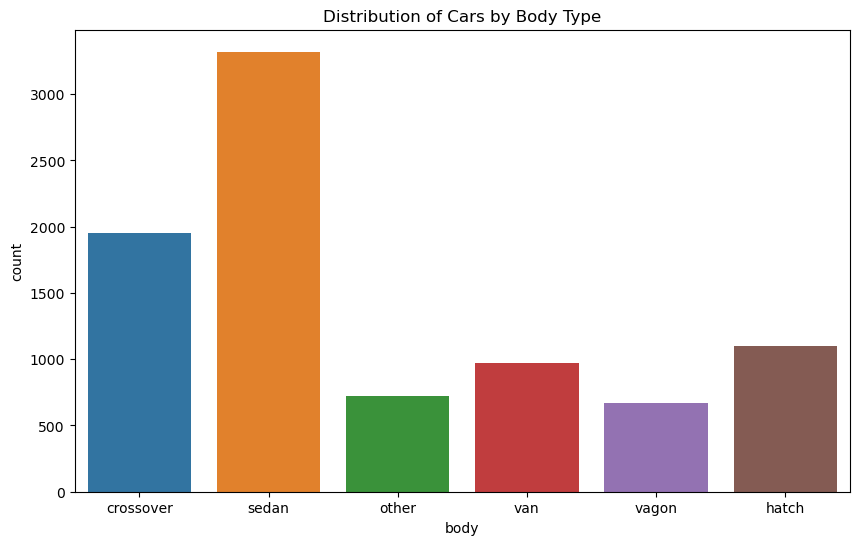

In [9]:
# Bar Plot - Distribution of Cars by Body Type
plt.figure(figsize=(10, 6))
sns.countplot(x='body', data=car_data)
plt.title('Distribution of Cars by Body Type')
plt.show()

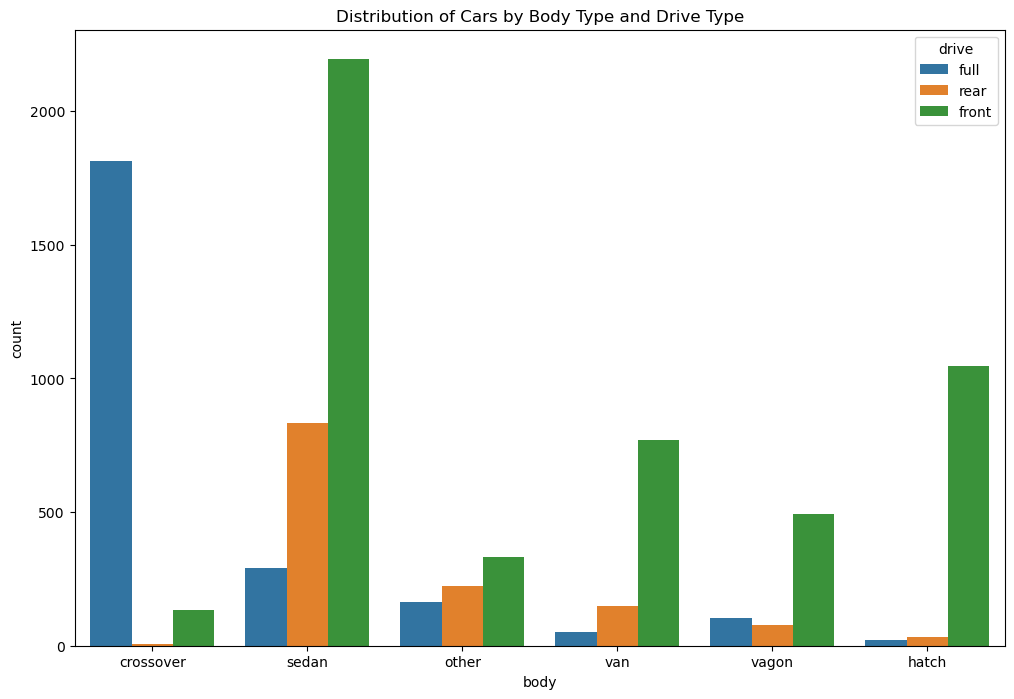

In [10]:
# Grouped Bar Plot - Distribution of Cars by Body Type and Drive Type
plt.figure(figsize=(12, 8))
sns.countplot(x='body', hue='drive', data=car_data)
plt.title('Distribution of Cars by Body Type and Drive Type')
plt.show()

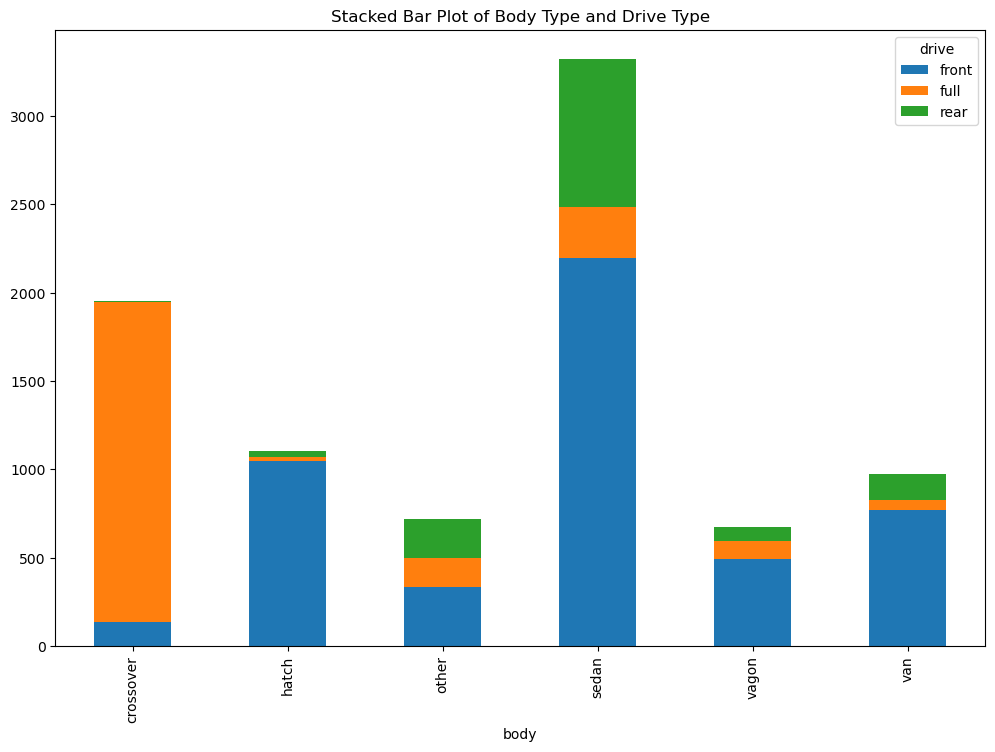

In [11]:
# Stacked Bar Plot - Distribution of Cars by Body Type and Drive Type
ct = pd.crosstab(car_data['body'], car_data['drive'])
ct.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Plot of Body Type and Drive Type')
plt.show()

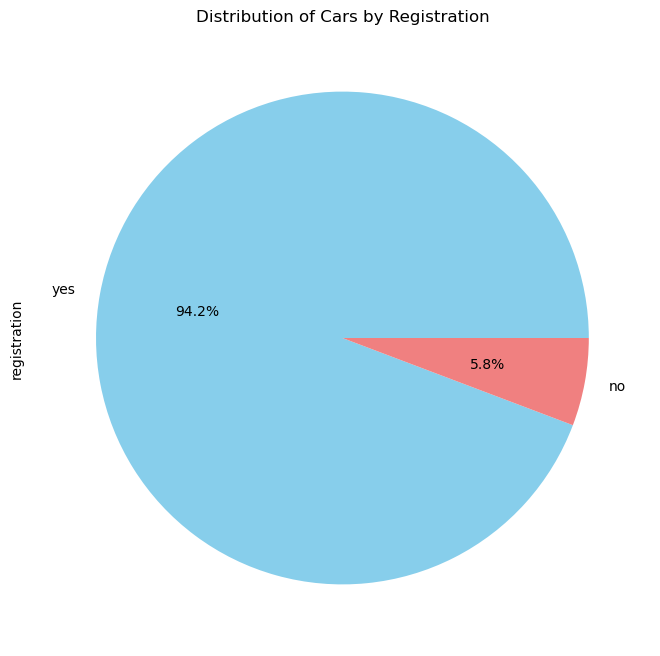

In [12]:
# Pie Chart - Distribution of Cars by Registration
plt.figure(figsize=(8, 8))
car_data['registration'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Cars by Registration')
plt.show()

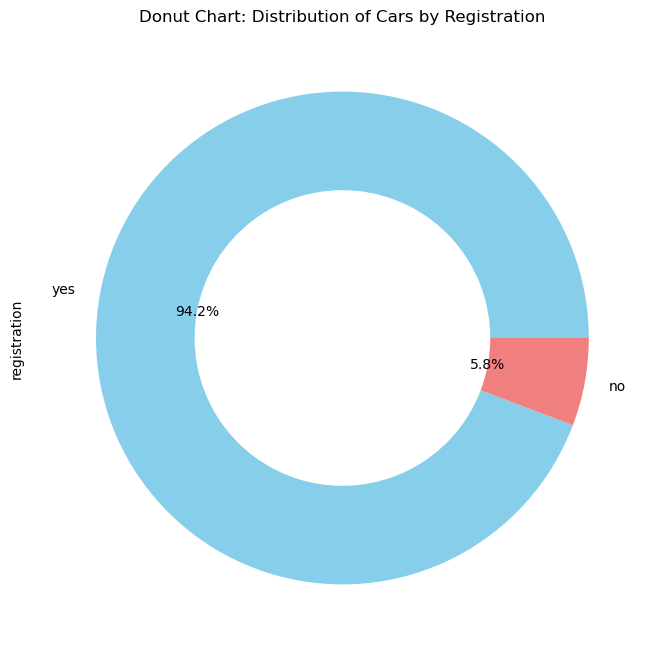

In [13]:
# Donut Chart - Distribution of Cars by Registration
plt.figure(figsize=(8, 8))
car_data['registration'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.4))
plt.title('Donut Chart: Distribution of Cars by Registration')
plt.show()

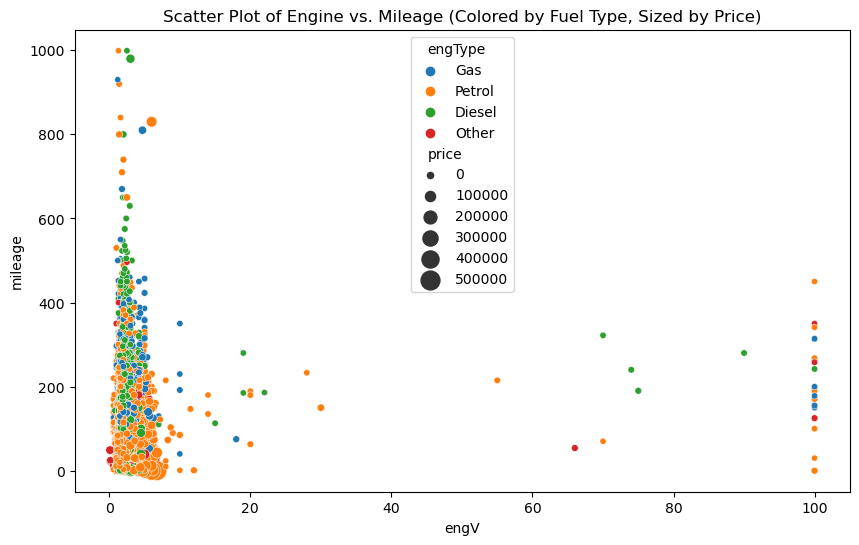

In [14]:
# Scatter Plot - Engine vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engV', y='mileage', data=car_data, hue='engType', size='price', sizes=(20, 200))
plt.title('Scatter Plot of Engine vs. Mileage (Colored by Fuel Type, Sized by Price)')
plt.show()

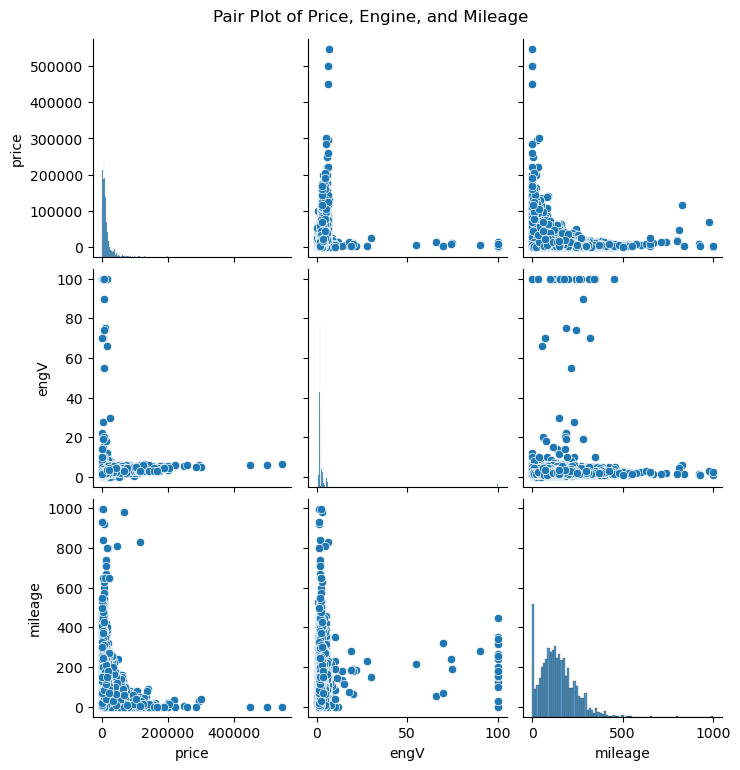

In [15]:
# Pair Plot - Price, Engine, Mileage
sns.pairplot(car_data[['price', 'engV', 'mileage']])
plt.suptitle('Pair Plot of Price, Engine, and Mileage', y=1.02)
plt.show()

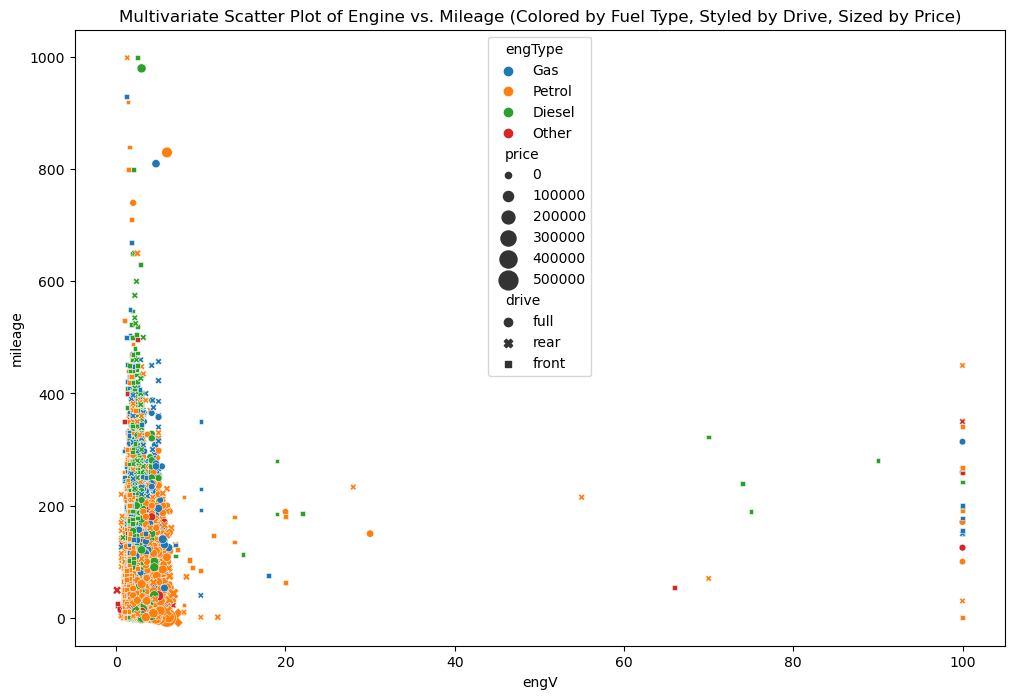

In [16]:
# Multivariate Scatter Plot - Engine vs. Mileage
plt.figure(figsize=(12, 8))
sns.scatterplot(x='engV', y='mileage', data=car_data, hue='engType', style='drive', size='price', sizes=(20, 200))
plt.title('Multivariate Scatter Plot of Engine vs. Mileage (Colored by Fuel Type, Styled by Drive, Sized by Price)')
plt.show()

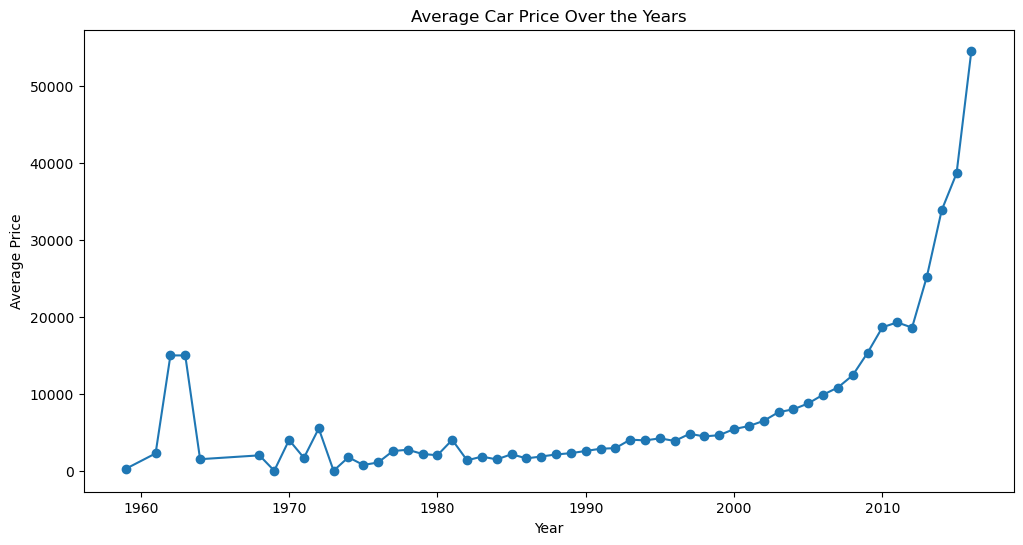

In [17]:
# Line Plot - Average Price Over the Years
plt.figure(figsize=(12, 6))
car_data.groupby('year')['price'].mean().plot(marker='o')
plt.title('Average Car Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

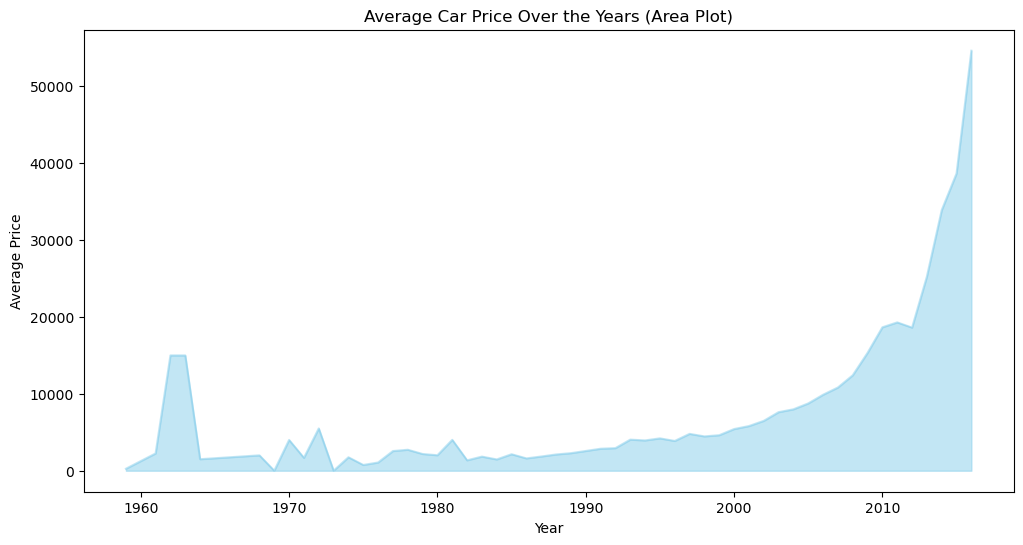

In [18]:
# Area Line Plot - Average Price Over the Years
plt.figure(figsize=(12, 6))
car_data.groupby('year')['price'].mean().plot(kind='area', color='skyblue', alpha=0.5)
plt.title('Average Car Price Over the Years (Area Plot)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

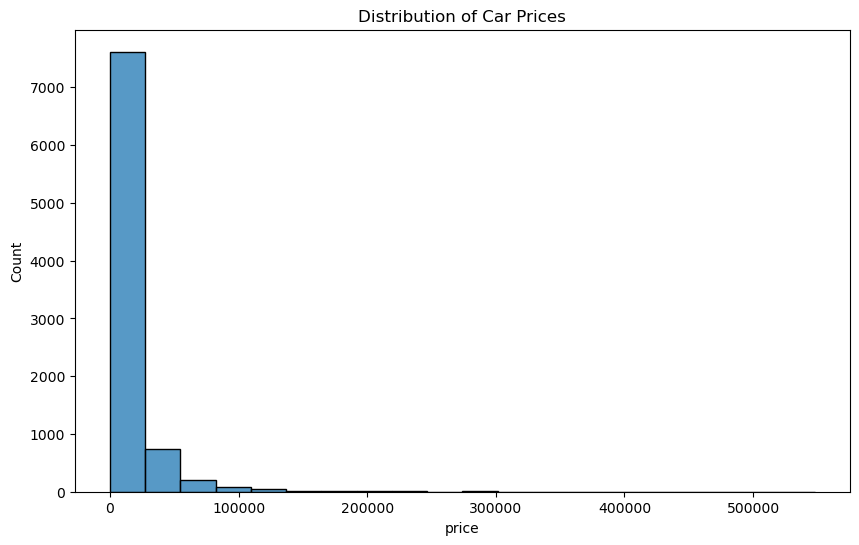

In [19]:
# Histogram - Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(car_data['price'], bins=20, kde=False)
plt.title('Distribution of Car Prices')
plt.show()

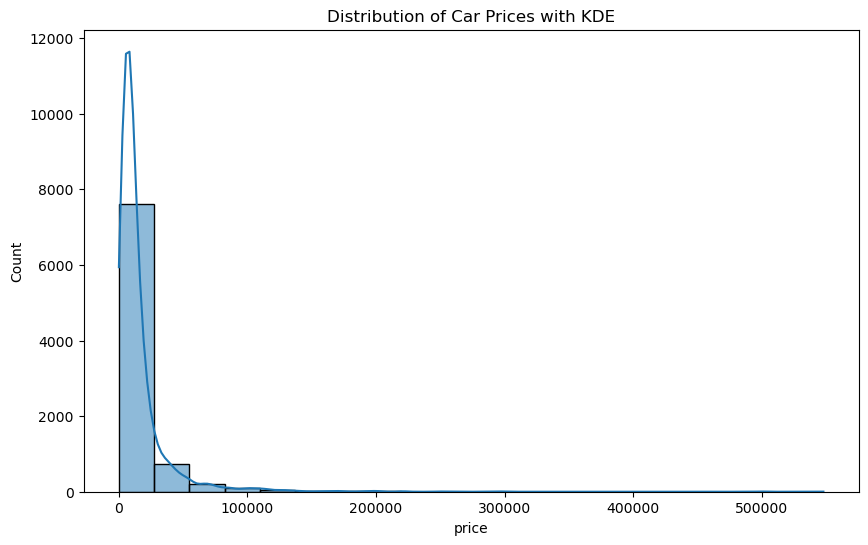

In [20]:
# Histogram with KDE - Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(car_data['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices with KDE')
plt.show()

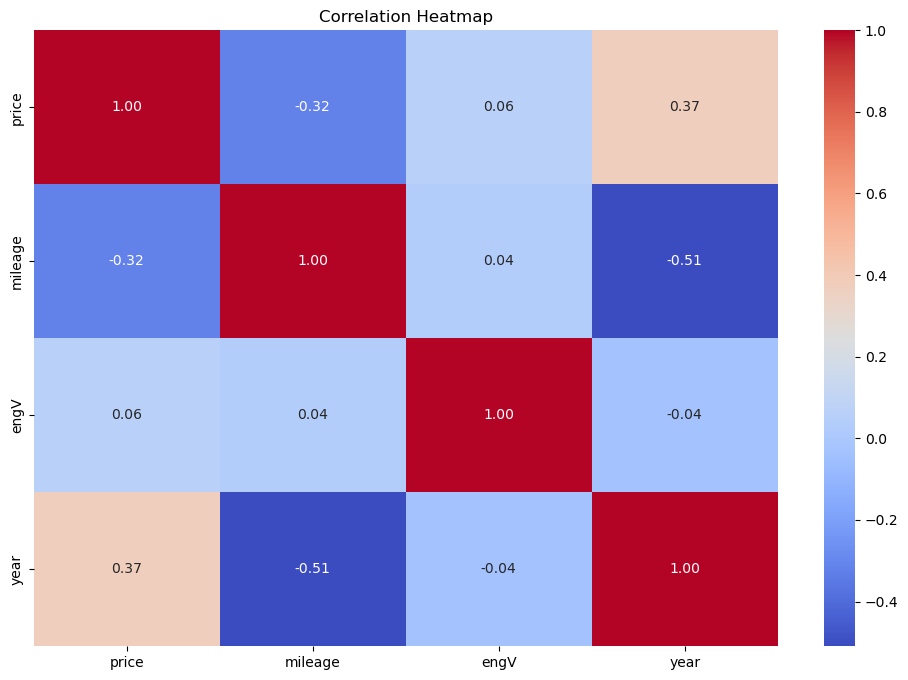

In [21]:
# Heatmap - Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = car_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

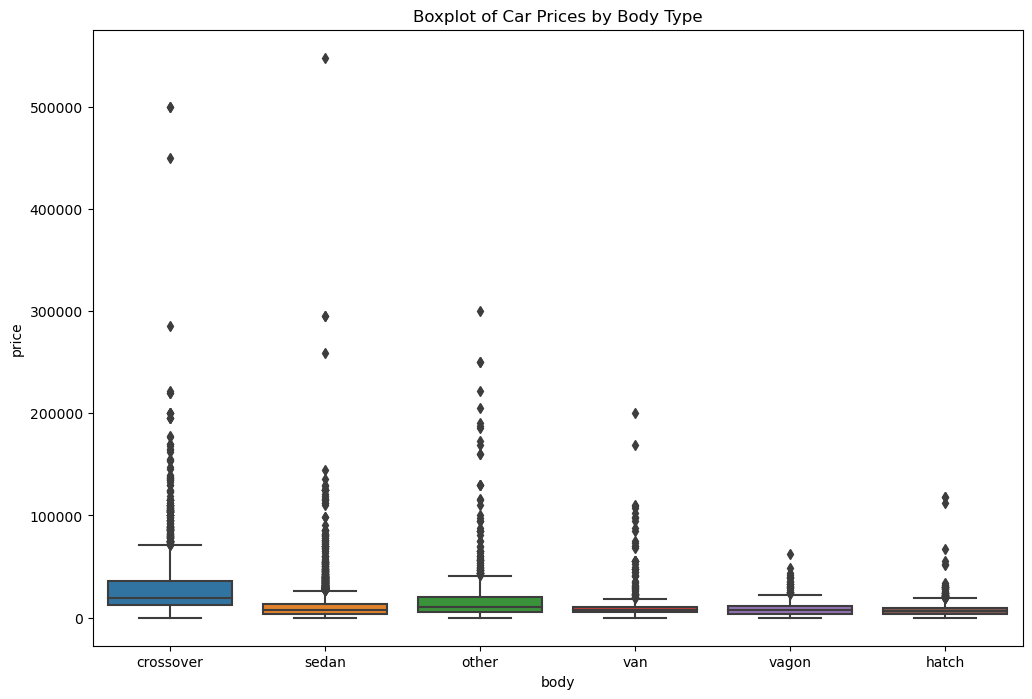

In [22]:
# Boxplot - Car Prices by Body Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='body', y='price', data=car_data)
plt.title('Boxplot of Car Prices by Body Type')
plt.show()

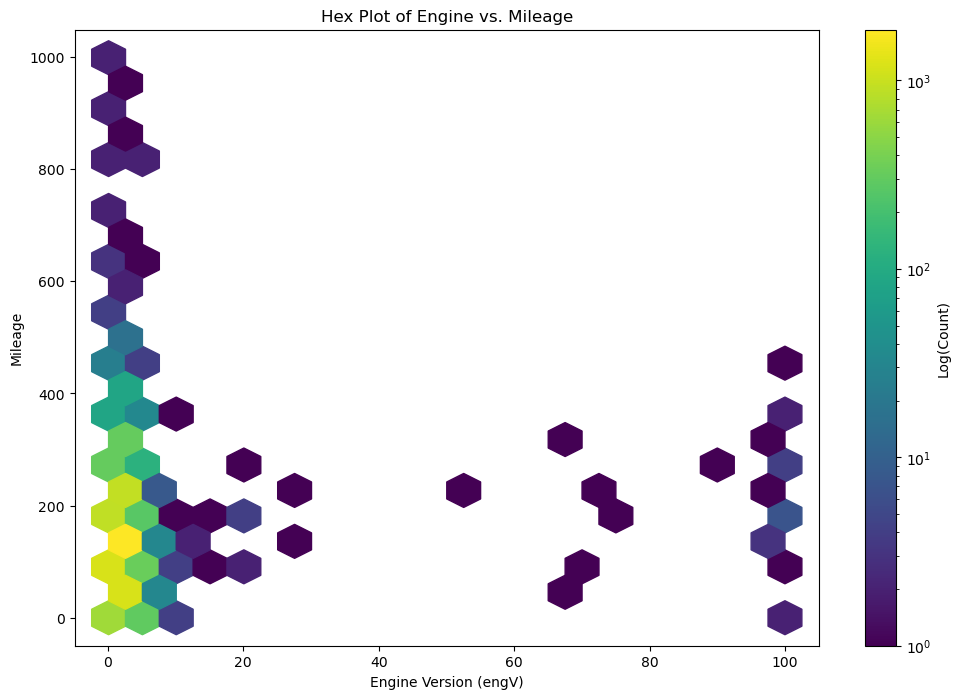

In [23]:
plt.figure(figsize=(12, 8))
plt.hexbin(x=car_data['engV'], y=car_data['mileage'], gridsize=20, cmap='viridis', bins='log', mincnt=1)
plt.colorbar(label='Log(Count)')
plt.title('Hex Plot of Engine vs. Mileage')
plt.xlabel('Engine Version (engV)')
plt.ylabel('Mileage')
plt.show()

In [27]:
x=car_data["price"]
print(x)
X = np.array(x)[:, np.newaxis]

print(X)

0       15500.0
1       20500.0
2       35000.0
3       17800.0
5       16600.0
         ...   
9571    14500.0
9572     2200.0
9573    18500.0
9574    16999.0
9575    22500.0
Name: price, Length: 8739, dtype: float64
[[15500.]
 [20500.]
 [35000.]
 ...
 [18500.]
 [16999.]
 [22500.]]


In [29]:
Y=car_data["year"]
print(Y)

0       2010
1       2011
2       2008
3       2012
5       2013
        ... 
9571    2011
9572    1986
9573    2008
9574    2008
9575    2007
Name: year, Length: 8739, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns 
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2,random_state=101)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(6991, 1)
(1748, 1)
(6991,)
(1748,)


In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [32]:
print(lm.coef_)
print(lm.intercept_)

[0.00010723]
2004.9226210067657


In [33]:
from sklearn.metrics import r2_score
from sklearn import metrics as mt
from sklearn.metrics import mean_squared_error
y_prediction =  lm.predict(train_X)
print(y_prediction)
y_prediction=y_prediction[:,np.newaxis]
print(y_prediction)

[2005.09954547 2018.32598964 2005.22285646 ... 2005.80188199 2005.45864853
 2008.13932225]
[[2005.09954547]
 [2018.32598964]
 [2005.22285646]
 ...
 [2005.80188199]
 [2005.45864853]
 [2008.13932225]]


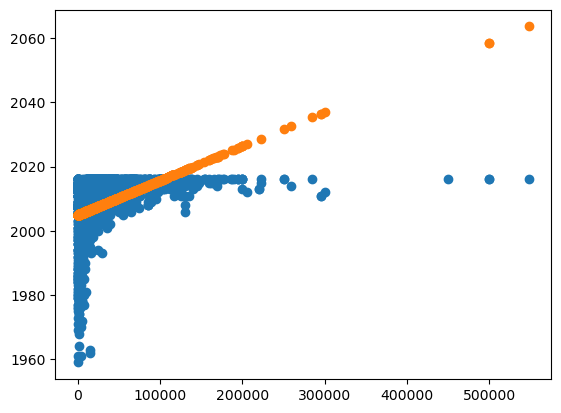

In [34]:
plt.scatter(X,Y)
plt.scatter(train_X,y_prediction)

In [50]:
score=r2_score(train_Y,y_prediction)
rms = np.sqrt(mean_squared_error(train_Y, y_prediction))
print("R2 score is:",score)
print("RMS value is:",rms)
print("The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(train_Y,y_prediction ),2))

R2 score is: 0.13864901403956953
RMS value is: 6.472594560223523
The Mean Absolute Error of model is: 4.62


C:\Users\lucks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

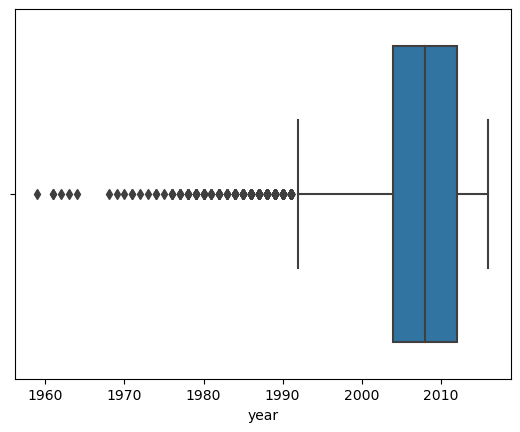

In [40]:
plt1 = sns.boxplot(Y)
plt.show

C:\Users\lucks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

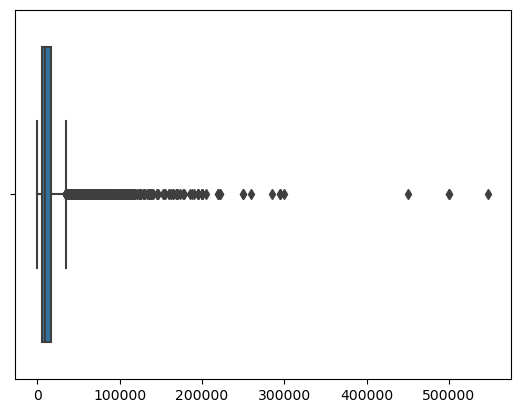

In [41]:
plt1 = sns.boxplot(X)
plt.show

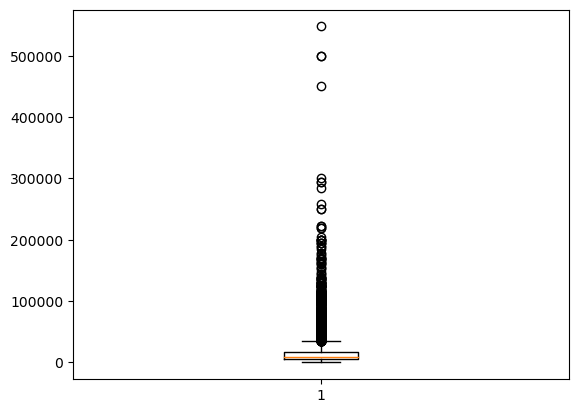

In [46]:
# outlier treatment for price
plt.boxplot(car_data.price)
Q1 = car_data.price.quantile(0.25)
Q3 = car_data.price.quantile(0.75)
IQR = Q3 - Q1
df = car_data[(car_data.price >= Q1 - 1.5*IQR) & (car_data.price <= Q3 + 1.5*IQR)]

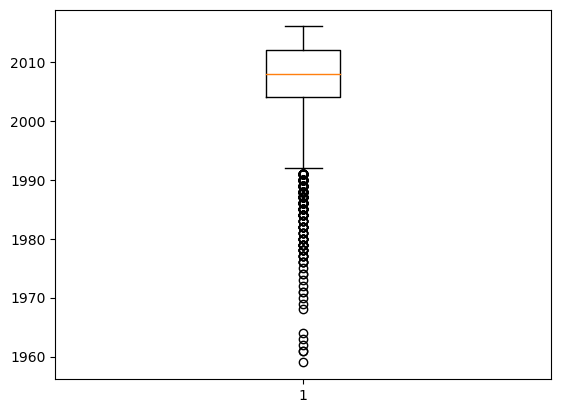

In [47]:
# outlier treatment for year_produced
plt.boxplot(Y)
Q1 = Y.quantile(0.25)
Q3 = Y.quantile(0.75)
IQR = Q3 - Q1
df = car_data[(Y >= Q1 - 1.5*IQR) & (Y <= Q3 + 1.5*IQR)]

In [51]:
score=r2_score(train_Y,y_prediction)
rms = np.sqrt(mean_squared_error(train_Y, y_prediction))
print("R2 score is:",score)
print("RMS value is:",rms)
print("The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(train_Y,y_prediction ),2))

R2 score is: 0.13864901403956953
RMS value is: 6.472594560223523
The Mean Absolute Error of model is: 4.62


NameError: name 'git' is not defined